In [17]:
import os
import sys
from collections import defaultdict

import pydicom
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [103]:
!mkdir ./dcm_scratch
!rm ./dcm_scratch/*
!cp /home/sam/liver_mri_bulk/1030316_20254_2_0.zip ./dcm_scratch/
!unzip ./dcm_scratch/1030316_20254_2_0.zip -d ./dcm_scratch/

mkdir: cannot create directory './dcm_scratch': File exists
Archive:  ./dcm_scratch/1030316_20254_2_0.zip
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016082811230713469273433.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016082811230714221073442.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016082811230714141773439.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016082811230714665373445.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016082811230714974473448.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016082811230714067373436.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016082811230877411873474.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016082811230875888673462.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016082811230876052073465.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2016082811230877043773471.dcm  
  inflating: ./dcm_scratch/1.3.12.

In [104]:
dcm_dir = './dcm_scratch/'
series = defaultdict(list)
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    #print(dcm)
    print(dcm.InstanceNumber, dcm.SeriesNumber, dcm.SeriesDescription, dcm.PixelSpacing)
    print(f" series num:{dcm.SeriesNumber} Instance number: {dcm.InstanceNumber}, big pix:{dcm.LargestImagePixelValue}, rows:{dcm.Rows}, cols:{dcm.Columns}")
    if dcm.LargestImagePixelValue < 1024:
        series[dcm.SeriesNumber].append(dcm.InstanceNumber)
print('len is:' ,len(series), series)
for k in series:
    print(len(series[k]))

6 40 LMS IDEAL OPTIMISED LOW FLIP 6DYN ['1.71875', '1.71875']
 series num:40 Instance number: 6, big pix:4095, rows:232, cols:256
3 47 LMS IDEAL OPTIMISED LOW FLIP 6DYN ['1.71875', '1.71875']
 series num:47 Instance number: 3, big pix:114, rows:232, cols:256
4 39 LMS IDEAL OPTIMISED LOW FLIP 6DYN ['1.71875', '1.71875']
 series num:39 Instance number: 4, big pix:72, rows:232, cols:256
6 42 LMS IDEAL OPTIMISED LOW FLIP 6DYN ['1.71875', '1.71875']
 series num:42 Instance number: 6, big pix:4095, rows:232, cols:256
2 46 LMS IDEAL OPTIMISED LOW FLIP 6DYN ['1.71875', '1.71875']
 series num:46 Instance number: 2, big pix:4095, rows:232, cols:256
2 38 LMS IDEAL OPTIMISED LOW FLIP 6DYN ['1.71875', '1.71875']
 series num:38 Instance number: 2, big pix:4095, rows:232, cols:256
4 46 LMS IDEAL OPTIMISED LOW FLIP 6DYN ['1.71875', '1.71875']
 series num:46 Instance number: 4, big pix:4095, rows:232, cols:256
5 38 LMS IDEAL OPTIMISED LOW FLIP 6DYN ['1.71875', '1.71875']
 series num:38 Instance number:

Series: lms_ideal_optimised_low_flip_6dyn, Instance number: 3, dcm series 47 big pix:114
Series: lms_ideal_optimised_low_flip_6dyn, Instance number: 4, dcm series 39 big pix:72
Series: lms_ideal_optimised_low_flip_6dyn, Instance number: 3, dcm series 43 big pix:115
Series: lms_ideal_optimised_low_flip_6dyn, Instance number: 5, dcm series 39 big pix:72
Series: lms_ideal_optimised_low_flip_6dyn, Instance number: 1, dcm series 37 big pix:213
Series: lms_ideal_optimised_low_flip_6dyn, Instance number: 2, dcm series 37 big pix:126
Series: lms_ideal_optimised_low_flip_6dyn, Instance number: 4, dcm series 37 big pix:72
Series: lms_ideal_optimised_low_flip_6dyn, Instance number: 5, dcm series 43 big pix:71
Series: lms_ideal_optimised_low_flip_6dyn, Instance number: 5, dcm series 41 big pix:71
Series: lms_ideal_optimised_low_flip_6dyn, Instance number: 3, dcm series 37 big pix:117
Series: lms_ideal_optimised_low_flip_6dyn, Instance number: 4, dcm series 45 big pix:71
Series: lms_ideal_optimised

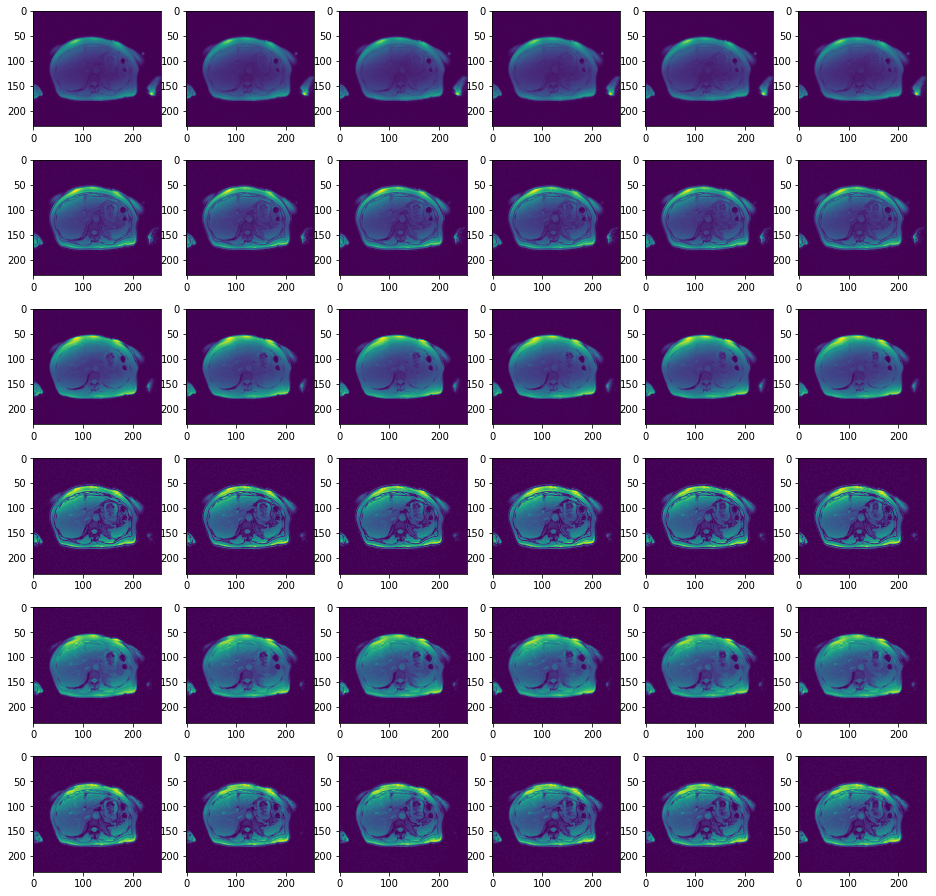

In [107]:
_, axes = plt.subplots(6, 6, figsize=(16, 16))
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    row = 0
    if dcm.LargestImagePixelValue > 1024:
        row = 1
        continue
    print(f"Series: {dcm.SeriesDescription.lower().replace(' ', '_')}, Instance number: {dcm.InstanceNumber}, dcm series {dcm.SeriesNumber} big pix:{dcm.LargestImagePixelValue}")
    ideal_index = 6*(dcm.InstanceNumber-1) + ((dcm.SeriesNumber-37)//2)  
    axes[ideal_index//6, ideal_index%6].imshow(dcm.pixel_array)

In [47]:
!rm ./dcm_scratch/*
!cp /mnt/disks/data/raw/mris/liver/1098695_20203_2_0.zip ./dcm_scratch/
!unzip ./dcm_scratch/1098695_20203_2_0.zip -d ./dcm_scratch/

Archive:  ./dcm_scratch/1098695_20203_2_0.zip
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253358943038549.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253356718138530.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253357913838542.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253356361638527.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253356737238531.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253357931238543.dcm  
  inflating: ./dcm_scratch/manifest.csv  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253357530238539.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253358920938548.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253360657938554.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253360312438552.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.4175

Series: gre_mullti_echo_10_te_liver Instance number: 6, pix space['2.5', '2.5'] big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 4, pix space['2.5', '2.5'] big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 5, pix space['2.5', '2.5'] big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 1, pix space['2.5', '2.5'] big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 8, pix space['2.5', '2.5'] big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 3, pix space['2.5', '2.5'] big pix:352
Series: gre_mullti_echo_10_te_liver Instance number: 8, pix space['2.5', '2.5'] big pix:297
Series: gre_mullti_echo_10_te_liver Instance number: 7, pix space['2.5', '2.5'] big pix:307
Series: gre_mullti_echo_10_te_liver Instance number: 5, pix space['2.5', '2.5'] big pix:321
Series: gre_mullti_echo_10_te_liver Instance number: 1, pix space['2.5', '2.5'] big pix:501
Series: gre_mullti_echo_10_te_liver Instance number: 9, pix space['2.5', '2

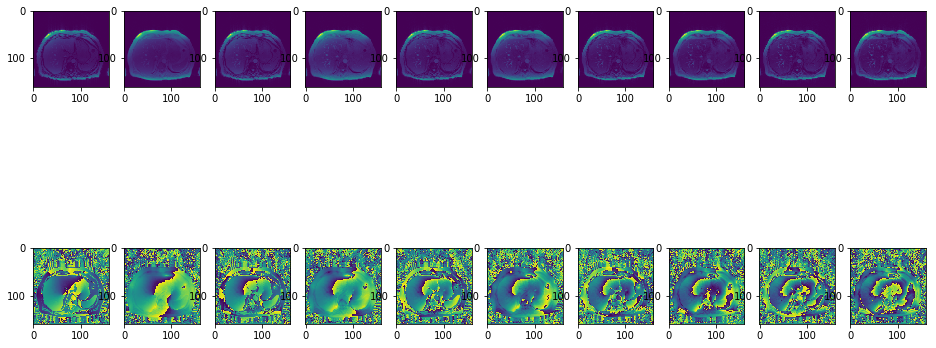

In [48]:
_, axes = plt.subplots(2, 10, figsize=(16, 8))
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    row = 0
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    print(f"Series: {dcm.SeriesDescription.lower().replace(' ', '_')} Instance number: {dcm.InstanceNumber}, pix space{dcm.PixelSpacing} big pix:{dcm.LargestImagePixelValue}")
    if dcm.LargestImagePixelValue > 1024:
        row = 1    
    axes[row, dcm.InstanceNumber-1].imshow(dcm.pixel_array)

In [49]:
!rm ./dcm_scratch/*
!cp /home/sam/liver_mri_bulk/1000107_20204_2_0.zip ./dcm_scratch/
!unzip ./dcm_scratch/1000107_20204_2_0.zip -d ./dcm_scratch/

Archive:  ./dcm_scratch/1000107_20204_2_0.zip
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2017071809483385305837807.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2017071809483585633937812.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2017071809483086606037792.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2017071809483289314837802.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2017071809483186500637797.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2017071809483787951137817.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2017071809482993688137787.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2017071809482993653237786.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2017071809483086571237791.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2017071809483186467037796.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2017071809483289280737801.dcm

Series description:shmolli_192i_liver_fitparams Series num:30 Instance number: 3, pix space['1.1458333730698', '1.1458333730698'] big pix:2509, rows:288, cols:384
Series description:shmolli_192i_liver Series num:28 Instance number: 2, pix space['1.1458333730698', '1.1458333730698'] big pix:4095, rows:288, cols:384
Series description:shmolli_192i_liver_t1map Series num:29 Instance number: 1, pix space['1.1458333730698', '1.1458333730698'] big pix:4095, rows:288, cols:384
Series description:shmolli_192i_liver Series num:28 Instance number: 5, pix space['1.1458333730698', '1.1458333730698'] big pix:4095, rows:288, cols:384
Series description:shmolli_192i_liver_fitparams Series num:30 Instance number: 5, pix space['1.1458333730698', '1.1458333730698'] big pix:3000, rows:288, cols:384
Series description:shmolli_192i_liver_fitparams Series num:30 Instance number: 4, pix space['1.1458333730698', '1.1458333730698'] big pix:4000, rows:288, cols:384
Series description:shmolli_192i_liver Series n

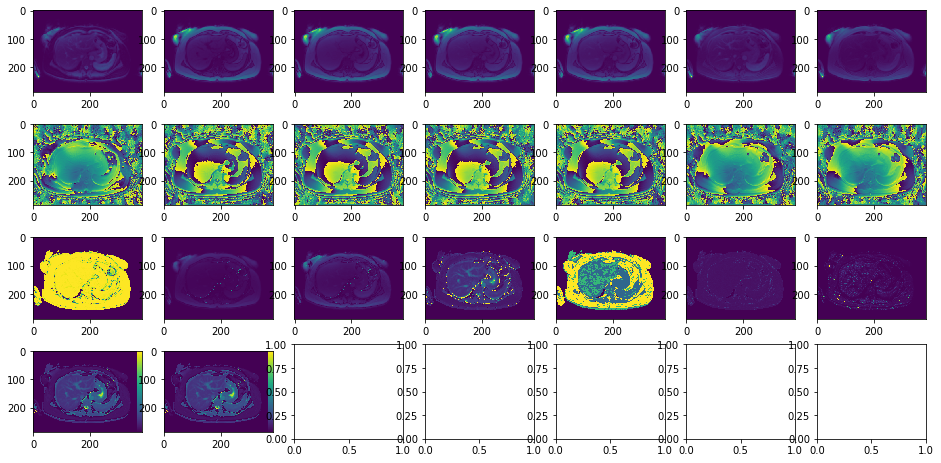

In [51]:
_, axes = plt.subplots(4, 7, figsize=(16, 8))
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    row = 0
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    print(f"Series description:{dcm.SeriesDescription.lower().replace(' ', '_')} Series num:{dcm.SeriesNumber} Instance number: {dcm.InstanceNumber}, pix space{dcm.PixelSpacing} big pix:{dcm.LargestImagePixelValue}, rows:{dcm.Rows}, cols:{dcm.Columns}")

    if 'fitparams' in dcm.SeriesDescription.lower():
        row = 2
    elif 't1map' in dcm.SeriesDescription.lower():
        row = 3
    elif dcm.LargestImagePixelValue > 1024:
        row = 1 
    axes[row, dcm.InstanceNumber-1].imshow(dcm.pixel_array)